# <center> S.Alireza Mousavizade </center>
## <center> 97106284 </center>

---

In [1]:
using DataFrames, CSV

--- 
# 1

In [2]:
data = DataFrame(CSV.File("crypto_data_1.csv"));
first(data, 5)

5×6 DataFrame
 Row │ Date        BTC-USD  ETH-USD   BNB-USD  ADA-USD   XRP-USD  
     │ Date…       Float64  Float64   Float64  Float64   Float64  
─────┼────────────────────────────────────────────────────────────
   1 │ 2020-12-31  29001.7   737.803  37.376   0.181397  0.219846
   2 │ 2021-01-01  29374.2   730.368  37.905   0.17535   0.237444
   3 │ 2021-01-02  32127.3   774.535  38.2416  0.177423  0.221655
   4 │ 2021-01-03  32782.0   975.508  41.149   0.204995  0.225848
   5 │ 2021-01-04  31971.9  1040.23   40.9264  0.224762  0.236677

In [3]:
rename!(data, [
    :Date,
    :BTC,
    :ETH,
    :BNB,
    :ADA,
    :XRP,
]);

In [4]:
symbols = propertynames(data);
symbols

6-element Vector{Symbol}:
 :Date
 :BTC
 :ETH
 :BNB
 :ADA
 :XRP

In [5]:
top5_market_cap_currencies_symbols = symbols[1:6];
df = data[!, top5_market_cap_currencies_symbols];

first(df, 5)

5×6 DataFrame
 Row │ Date        BTC      ETH       BNB      ADA       XRP      
     │ Date…       Float64  Float64   Float64  Float64   Float64  
─────┼────────────────────────────────────────────────────────────
   1 │ 2020-12-31  29001.7   737.803  37.376   0.181397  0.219846
   2 │ 2021-01-01  29374.2   730.368  37.905   0.17535   0.237444
   3 │ 2021-01-02  32127.3   774.535  38.2416  0.177423  0.221655
   4 │ 2021-01-03  32782.0   975.508  41.149   0.204995  0.225848
   5 │ 2021-01-04  31971.9  1040.23   40.9264  0.224762  0.236677

In [6]:
using Statistics: mean, std

symbols = propertynames(df);
for symbol ∈ symbols[2:end]
    df[:, string(symbol)*"_normalized"] = (df[:, symbol] .- mean(df[:, symbol])) ./ std(df[:, symbol])
end

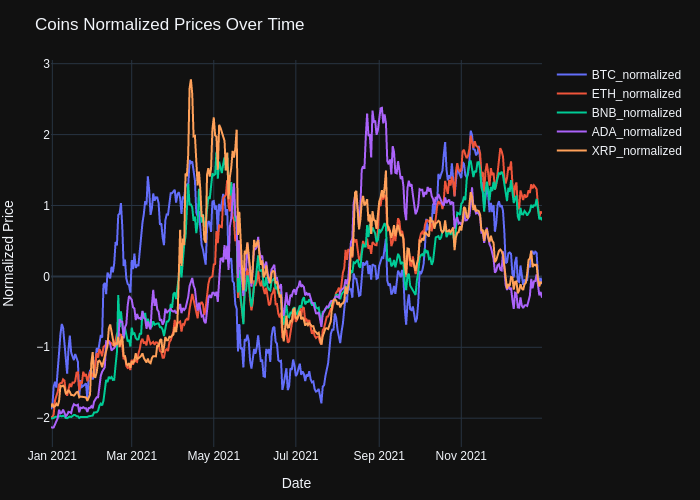

In [7]:
using PlotlyJS

templates.default = "plotly_dark";
templates

currency_symbols = Symbol.(names(df)[7:11]);

# marker=attr(size=2, line=attr(width=1, color="Red")),
# PlotlyJS.Layout(
#     title="Sharpe",
#     width=800, height=800,
# )
# )

plot(
    [scatter(df, x=:Date, y=symbol, mode="lines", name=string(symbol)) for symbol in currency_symbols],
    PlotlyJS.Layout(
        title="Coins Normalized Prices Over Time", 
        width=900,
        height=600,
        xaxis_title="Date",
        yaxis_title="Normalized Price",
     )
)

# Return:

#### Yearly Compound Return Rate:
 $\Pi_i (1 + r_i)$ where $r_i$ is daily return
#### Geometric Mean Daily Return:
 $\{\Pi_i (1 + r_i)\}^{\frac{1}{365}} - 1$ 


In [8]:
pct_change(array) = array[2:end] ./ array[1:end-1] .- 1;

In [9]:
symbols = propertynames(df[!, 2:6]);
results = DataFrame(CurrencySymbol=String[], YearlyCompoundReturn=Float64[], DailyAverageReturn=Float64[]);

all_coin_so_far_returns = DataFrame()

all_coin_so_far_returns[!, :Date] = df[2:end, :Date];
for (k, symbol) ∈ enumerate(symbols)
    returns = pct_change(df[!, symbol])
    n_interval = size(returns, 1)
    push!(results, [string(symbol), prod(returns .+ 1), prod(returns .+ 1)^(1 / n_interval) - 1])

    ###

    symbol_so_far_return = 0;
    symbol_so_far_returns = zeros(Float64, size(returns));
    for (k, ret) ∈ enumerate(returns)
        symbol_so_far_return = (symbol_so_far_return + 1) * (ret + 1) - 1;
        symbol_so_far_returns[k] = symbol_so_far_return;
    end

    all_coin_so_far_returns[!, symbol] = symbol_so_far_returns;
end

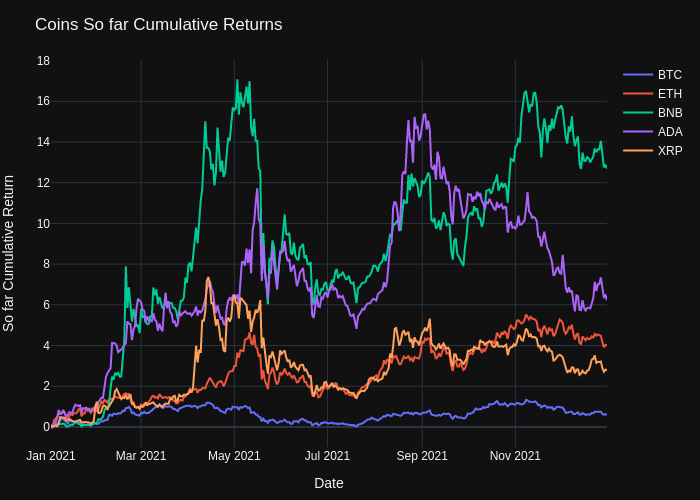

In [10]:
using PlotlyJS

templates.default = "plotly_dark";
templates

coins_symbols = propertynames(all_coin_so_far_returns)[2:end]
# marker=attr(size=2, line=attr(width=1, color="Red")),
# PlotlyJS.Layout(
#     title="Sharpe",
#     width=800, height=800,
# )
# )

plot(
    [scatter(all_coin_so_far_returns, x=:Date, y=symbol, mode="lines", name=string(symbol)) for symbol in coins_symbols],
    PlotlyJS.Layout(
        title="Coins So far Cumulative Returns",
        width=900,
        height=600,
        xaxis_title="Date",
        yaxis_title="So far Cumulative Return",)
)

### Result: BNB is more profitable than all other coins.

--- 

# 2


from 2022-01-01 to 2022-06-01 

In [11]:
df = DataFrame(CSV.File("crypto_data_2.csv"));

rename!(df, [
    :Date,
    :BTC,
    :ETH,
    :BNB,
    :ADA,
    :XRP,
]);

### Compute Returns

In [12]:
pct_change(array) = array[2:end] ./ array[1:end-1] .- 1;

results = DataFrame(
    CurrencySymbol=String[],
    CumulativeReturnInBTCNegativeDays=Float64[],
    CumulativeReturnInBTCPositiveDays=Float64[]
);

symbols = propertynames(df[!, 2:end]);
symbols_returns = DataFrame()

symbols_returns[!, :Date] = df[2:end, :Date];
symbols_returns[!, :BTC] = btc_returns = pct_change(df[!, :BTC]);

altcoins_symbols = symbols[2:end];
btc_returns = symbols_returns[!, :BTC];

cumulative_return(returns) = prod(returns .+ 1);

for (k, altcoin_symbol) ∈ enumerate(altcoins_symbols)
    altcoin_symbol_str = string(altcoin_symbol)
    
    altcoin_returns = symbols_returns[!, altcoin_symbol] = pct_change(df[!, altcoin_symbol])

    altcoin_returns_in_btc_negative_days = altcoin_returns[btc_returns.<0]
    btc_negative_days_cumulative_return = cumulative_return(altcoin_returns_in_btc_negative_days)

    altcoin_returns_in_btc_positive_days = altcoin_returns[btc_returns.≥0]
    btc_positive_days_cumulative_return = cumulative_return(altcoin_returns_in_btc_positive_days)

    push!(results,
        [altcoin_symbol_str,
            btc_negative_days_cumulative_return,
            btc_positive_days_cumulative_return])

    print(
        "Symbol: $(altcoin_symbol_str) $(length(altcoin_returns[altcoin_returns .≥ 0])), $(length(altcoin_returns[altcoin_returns .< 0])) \n\n")
end

results


Symbol: ETH 76, 75 

Symbol: BNB 75, 76 

Symbol: ADA 71, 80 

Symbol: XRP 71, 80 



4×3 DataFrame
 Row │ CurrencySymbol  CumulativeReturnInBTCNegativeDays  CumulativeReturnInBT ⋯
     │ String          Float64                            Float64              ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ ETH                                     0.0836612                       ⋯
   2 │ BNB                                     0.107871
   3 │ ADA                                     0.0563116
   4 │ XRP                                     0.0956058
                                                                1 column omitted

--- 

# 3

from 2021-01-01 to 2022-01-01

In [13]:
data = DataFrame(CSV.File("crypto_data_3.csv"));

rename!(data, [
    :Date,
    :BTC,
    :ETH,
    :BNB,
    :ADA,
    :XRP,
]);

### Calculate Retruns Data

In [14]:
pct_change(array) = array[2:end] ./ array[1:end-1] .- 1;
function calculate_returns_data(prices_data)
    symbols = propertynames(prices_data[!, 1:end])
    returns_data = DataFrame()
    for (k, symbol) ∈ enumerate(symbols)
        returns_data[!, symbol] = pct_change(prices_data[!, symbol])
    end
    returns_data
end;

## Portfolio Structure

In [15]:
mutable struct Portfolio
    weights::Vector{Float64}
    symbols::Vector{Symbol}

    prices_data::DataFrame
    returns_data::DataFrame

    function Portfolio(
        prices_data::DataFrame,
        weights::Vector{Float64},
        symbols::Vector{Symbol})

        returns_data = calculate_returns_data(prices_data)
        new(weights, symbols, prices_data, returns_data)
    end
end

## Portfolio Return

### Sample:

In [16]:
symbol_returns(returns_data, symbol::Symbol) = returns_data[!, symbol];

symbol_cumulative_return(returns::Vector{Float64}) = prod(returns .+ 1);

function portfolio_return(portfolio::Portfolio)
    portfo_symbols_returns = symbol_returns.(Ref(portfolio.returns_data), portfolio.symbols)
    portfo_symbols_cumulative_returns = symbol_cumulative_return.(portfo_symbols_returns)    

    portfo_symbols_weighted_returns = portfolio.weights .* portfo_symbols_cumulative_returns
    portfo_symbols_total_returns = sum(portfo_symbols_weighted_returns)
end;

In [17]:
portfo_symbols = [
    :BTC,
    :ETH,
    :BNB,
    :ADA,
    :XRP,
]
portfo = Portfolio(data[:, portfo_symbols], [0.3, 0.2, 0.2, 0.15, 0.15], portfo_symbols);
portfo_return = portfolio_return(portfo);
portfo_return

0.6937367738529198

## Portfolio Variance

The sample covariance matrix is a $K \times K$ matrix ${\displaystyle \textstyle \mathbf{Q} =\left[q_{jk}\right]}$ with entries:

$$
    q_{jk} = \frac{1}{N - 1} \sum_{i=1}^{n} (x_{ij} - \bar{x}_j) (x_{ik} - \bar{x}_k)
$$

where ${\displaystyle q_{jk}}$ is an estimate of the covariance between the $\mathrm{j^{th}}$ variable and $\mathrm{k^{th}}$ variable of the population underlying the data. In terms of the observation vectors, the sample covariance is:

$$
    \mathbf{Q} = \frac{1}{N - 1} \sum_{i=1}^{n} 
    \mathbf{(x_i - \bar{x}) (x_i - \bar{x})^T}
$$

In [18]:
using Statistics: cov, var

function portfolio_variance(portfolio::Portfolio)
    Q = cov(Matrix(portfolio.returns_data))
    w = portfolio.weights
    portfo_variance = w' * Q * w
    portfo_variance
end;

### Sample:

In [19]:
portfo_symbols = [
    :BTC,
    :ETH,
    :BNB,
    :ADA,
    :XRP,
]
portfo = Portfolio(data[!, portfo_symbols], [0.3, 0.2, 0.2, 0.15, 0.15], portfo_symbols);
portfo_variance = portfolio_variance(portfo);
portfo_variance

0.0015427420540667718

## Sharp Ratio

In [20]:
function sharp_ratio(portfolio::Portfolio; risk_free_rate=0.02)
    portfo_return = portfolio_return(portfolio)
    portfo_std = portfolio_variance(portfolio)^0.5
    sharp_ratio = (portfo_return - risk_free_rate) / portfo_std
    sharp_ratio
end;

### Sample:

In [21]:
portfo_symbols = [
    :BTC,
    :ETH,
    :BNB,
    :ADA,
    :XRP,
]
portfo = Portfolio(data[:, portfo_symbols], [0.3, 0.2, 0.2, 0.15, 0.15], portfo_symbols);
portfo_sharp_ratio = sharp_ratio(portfo);
portfo_sharp_ratio

17.153138470100885

## Calculate Return, Variance and Sharpe Ratio for each weights combination

### Find all Triplets ($w_1, w_2, w_3$) Such That: $w_1 + w_2 + w_3 = 1$

In [22]:
step = 0.05;
possibilities = 0:step:1;
triplets = [];

for p1 ∈ possibilities
    for p2 ∈ possibilities
        for p3 ∈ possibilities
            for p4 ∈ possibilities
                p5 = 1 - p1 - p2 - p3 - p4;
                if p5 ≥ 0
                    push!(triplets, [p1, p2, p3, p4, p5])
                end
            end
        end
    end
end

In [23]:
results = DataFrame();

portfo_symbols = [
    :BTC,
    :ETH,
    :BNB,
    :ADA,
    :XRP,
];
n = length(portfo_symbols);

# Add Weights Columns
results[!, :Weights] = triplets;

# Add StandardDeviations Columns
transform!(
    results,
    [:Weights] => ByRow(weights -> portfolio_variance(Portfolio(data[!, portfo_symbols], weights, portfo_symbols))^0.5) => :PortfolioStandardDeviation
);

# Add Returns Columns
transform!(
    results,
    [:Weights] => ByRow(weights -> portfolio_return(Portfolio(data[!, portfo_symbols], weights, portfo_symbols))) => :PortfolioReturn
);

# Add SharpRatio Columns
transform!(
    results,
    [:Weights] => ByRow(weights -> sharp_ratio(Portfolio(data[!, portfo_symbols], weights, portfo_symbols), risk_free_rate=0.02)) => :PortfolioSharpeRatio
);

first(results, 5)

5×4 DataFrame
 Row │ Weights                      PortfolioStandardDeviation  PortfolioRetur ⋯
     │ Any                          Float64                     Float64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ [0.0, 0.0, 0.0, 0.0, 1.0]                     0.050481          0.40308 ⋯
   2 │ [0.0, 0.0, 0.0, 0.05, 0.95]                   0.0499886         0.40087
   3 │ [0.0, 0.0, 0.0, 0.1, 0.9]                     0.0495566         0.39865
   4 │ [0.0, 0.0, 0.0, 0.15, 0.85]                   0.0491865         0.39644
   5 │ [0.0, 0.0, 0.0, 0.2, 0.8]                     0.0488797         0.39422 ⋯
                                                               2 columns omitted

In [24]:
using PlotlyJS

In [25]:
templates.default = "plotly_dark";
PlotlyJS.templates

Templates configuration
-----------------------
Default template: plotly_dark
Available templates: [:presentation, :plotly_dark, :ggplot2, :plotly, :seaborn, :ygridoff, :plotly_white, :simple_white, :xgridoff, :gridon]



In [26]:
vector_string_represent(vector::Vector) = "Weights: " * join(vector, ", ");

results[!, :WeightsStringRepresent] = vector_string_represent.(results[!, :Weights]);

### Maximum Sharpe Ratio Portfolio

In [27]:
maximum_sharp_ratio_portfolio_index = argmax(results[!, :PortfolioSharpeRatio]);
efficient_frontier_portfo_results = results[maximum_sharp_ratio_portfolio_index, :];
optimum_weights, optimum_portfo_std, optimum_portfo_return, optimum_portfo_sharpe_ratio = efficient_frontier_portfo_results

efficient_frontier_portfo_results

DataFrameRow
  Row │ Weights                      PortfolioStandardDeviation  PortfolioRetu ⋯
      │ Any                          Float64                     Float64       ⋯
──────┼─────────────────────────────────────────────────────────────────────────
 9836 │ [0.75, 0.0, 0.25, 0.0, 0.0]                   0.0359769         0.8648 ⋯
                                                               3 columns omitted

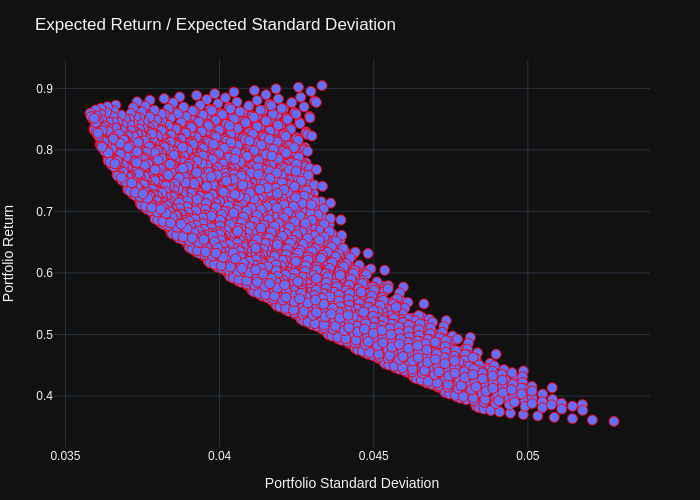

In [28]:
ax = plot(
    results,
    x=:PortfolioStandardDeviation,
    y=:PortfolioReturn,
    text=:WeightsStringRepresent,
    kind="scatter",
    mode="markers",
    labels=Dict(
        :PortfolioStandardDeviation => "Portfolio Standard Deviation",
        :PortfolioReturn => "Portfolio Return",
    ),
    marker=attr(size=10, line=attr(width=1, color="Red")),
    PlotlyJS.Layout(
        title="Expected Return / Expected Standard Deviation",
        width=800, height=800,
    )
)

In [29]:
CSV.write("portfolio.csv", results);

---

# 4

In [30]:
data = DataFrame(CSV.File("crypto_data_4.csv"));

rename!(data, [
    :Date,
    :BTC,
    :ETH,
    :BNB,
    :ADA,
    :XRP,
]);

In [31]:
btc_prices = data[!, [:Date, :BTC]];

In [32]:
using PlotlyJS

templates.default = "plotly_dark";
PlotlyJS.templates

Templates configuration
-----------------------
Default template: plotly_dark
Available templates: [:presentation, :plotly_dark, :ggplot2, :plotly, :seaborn, :ygridoff, :plotly_white, :simple_white, :xgridoff, :gridon]



In [33]:
using Indicators: sma, ema, wma, trima, crossover, crossunder

In [34]:
moving_average_results = DataFrame();
moving_average_results = btc_prices[:, :];
moving_average_results = rename(moving_average_results, :BTC => :RawPrice);

step = 5;
[moving_average_results[:, "SMA_$(d)Days"] = sma(btc_prices[:, :BTC], n=d) for d ∈ 5:step:100];

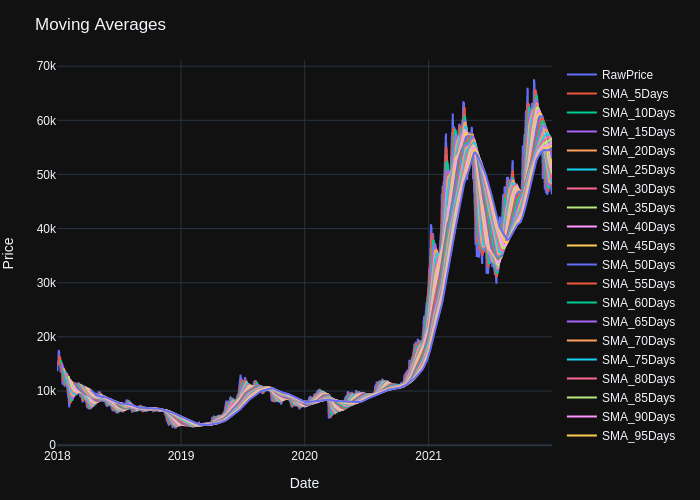

In [35]:
plot(
    [scatter(
        moving_average_results,
        x=:Date,
        y=column,
        mode="lines",
        name=string(column))
     for column in propertynames(moving_average_results)[2:end]],
    PlotlyJS.Layout(
        title="Moving Averages",
        width=900,
        height=600,
        xaxis_title="Date",
        yaxis_title="Price",)
)

### Sample:

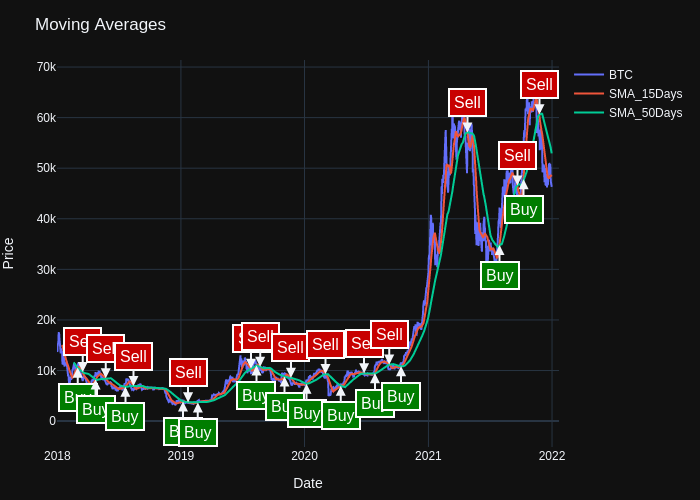

In [36]:
first_ma = Symbol("SMA_15Days");
second_ma = Symbol("SMA_50Days");

co_mask = crossover(moving_average_results[:, first_ma], moving_average_results[:, second_ma]);
cu_mask = crossunder(moving_average_results[:, first_ma], moving_average_results[:, second_ma]);

co_results = moving_average_results[:, [:Date, first_ma]][co_mask, :];
cu_results = moving_average_results[:, [:Date, second_ma]][cu_mask, :];

buy_signal_annotations = [
    attr(
        x=date,
        y=price,
        text="Buy",
        showarrow=true,
        font=attr(
            # family="Courier New, monospace",
            size=16,
            color="rgb(255, 255, 255)"
        ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="(255, 255, 255)",
        ax=0,
        ay=30,
        bordercolor="rgb(255, 255, 255)",
        borderwidth=2,
        borderpad=4,
        bgcolor="#rgb(0, 125, 0)",
        opacity=1.0
    )
    for (date, price) ∈ eachrow(co_results)
]

sell_signal_annotations = [
    attr(
        x=date,
        y=price,
        text="Sell",
        showarrow=true,
        font=attr(
            # family="Courier New, monospace",
            size=16,
            color="rgb(255, 255, 255)"
        ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="(255, 255, 255)",
        ax=0,
        ay=-30,
        bordercolor="rgb(255, 255, 255)",
        borderwidth=2,
        borderpad=4,
        bgcolor="#rgb(200, 0, 0)",
        opacity=1.0
    )
    for (date, price) ∈ eachrow(cu_results)
]

annotations = append!(buy_signal_annotations, sell_signal_annotations);

plot([
        scatter(
            moving_average_results,
            x=:Date,
            y=:RawPrice,
            mode="lines",
            name=string(:BTC)),
        scatter(
            moving_average_results,
            x=:Date,
            y=first_ma,
            mode="lines",
            name=string(first_ma)),
        scatter(
            moving_average_results,
            x=:Date,
            y=second_ma,
            mode="lines",
            name=string(second_ma)),
    ],
    Layout(
        title="Moving Averages",
        width=900,
        height=600,
        annotations=annotations,
        xaxis_title="Date",
        yaxis_title="Price",
    )
)

In [37]:
pct_change(array) = array[2:end] ./ array[1:end-1] .- 1;
cumulative_return(returns; side="Long") = side == "Long" ? prod(returns .+ 1) - 1 : -(prod(returns .+ 1) - 1);

In [38]:
using Dates
sma_symbols = filter(sym -> startswith(string(sym), "SMA"), propertynames(moving_average_results));
i = 3;
j = 10;
ma1_symbol, ma2_symbol = sma_symbols[[i, j]];

co_mask = crossover(moving_average_results[:, ma1_symbol], moving_average_results[:, ma2_symbol]);
cu_mask = crossunder(moving_average_results[:, ma1_symbol], moving_average_results[:, ma2_symbol]);

co_results = moving_average_results[:, [:Date, ma1_symbol]][co_mask, :];
cu_results = moving_average_results[:, [:Date, ma2_symbol]][cu_mask, :];

buy_signals = DataFrame()
buy_signals[:, :Date] = co_results[:, :Date];
buy_signals[:, :Signal] .= "Buy";
sell_signals = DataFrame()
sell_signals[:, :Date] = cu_results[:, :Date];
sell_signals[:, :Signal] .= "Sell";

signals = vcat(buy_signals, sell_signals);
sort!(signals, :Date);

n = size(signals, 1);

signals_returns = DataFrame(
    MA1=Symbol[],
    MA2=Symbol[],
    StartDate=Date[],
    EndDate=Date[],
    Side=String[],
    StartDatePrice=Float64[],
    EndDatePrice=Float64[],
    CumulativeReturn=Float64[],
    Return=Float64[],
);
for k ∈ 1:n-1
    current_signal = signals[k, :Signal]
    side = current_signal == "Buy" ? "Long" : "Short"

    start_date = signals[k, :Date]
    end_date = signals[k+1, :Date]

    prices_in_interval = filter(:Date => date -> start_date ≤ date < end_date, btc_prices)
    returns_in_interval = pct_change(prices_in_interval[:, :BTC])
    interval_cumulative_return = cumulative_return(returns_in_interval, side=side)

    start_price = prices_in_interval[1, :BTC]
    end_price = prices_in_interval[end, :BTC]
    interval_return = side == "Long" ? end_price / start_price - 1 : -(end_price / start_price - 1)

    result = [
        ma1_symbol,
        ma2_symbol,
        start_date,
        end_date,
        side,
        start_price,
        end_price,
        interval_cumulative_return,
        interval_return,
    ]

    push!(signals_returns, result)
end

strategy_total_return = (prod(signals_returns[!, :CumulativeReturn] .+ 1) - 1) * 100;
strategy_total_return
signals_returns[:, end-4:end]
# signals_returns

25×5 DataFrame
 Row │ Side    StartDatePrice  EndDatePrice  CumulativeReturn  Return     
     │ String  Float64         Float64       Float64           Float64    
─────┼────────────────────────────────────────────────────────────────────
   1 │ Long          11086.4        8338.35        -0.247876   -0.247876
   2 │ Short          7916.88       8930.88        -0.128081   -0.128081
   3 │ Long           9697.5        7557.82        -0.220642   -0.220642
   4 │ Short          7587.34       7354.13         0.0307367   0.0307367
   5 │ Long           7419.29       6297.57        -0.15119    -0.15119
   6 │ Short          6199.71       4076.63         0.342448    0.342448
   7 │ Long           4025.25       3576.03        -0.1116     -0.1116
   8 │ Short          3604.58       3947.09        -0.0950229  -0.0950229
  ⋮  │   ⋮           ⋮              ⋮               ⋮              ⋮
  19 │ Long          10990.9       10280.4         -0.0646465  -0.0646465
  20 │ Short         10369.6       11384.2         -0.0978458  -0.0978458
  21 │ Long          11555.4       49004.3          3.24082     3.24082
  22 │ Short         54021.8       40008.4          0.259402    0.259402
  23 │ Long          42235.5       42843.8          0.0144015   0.0144015
  24 │ Short         40693.7       53967.8         -0.326197   -0.326197
  25 │ Long          54968.2       56280.4          0.023872    0.023872
                                                           10 rows omitted

In [39]:
ma_signal_returns = DataFrame(
    MA1=Symbol[],
    MA2=Symbol[],
    StartDate=Date[],
    EndDate=Date[],
    Side=String[],
    StartDatePrice=Float64[],
    EndDatePrice=Float64[],
    CumulativeReturn=Float64[],
);

sma_symbols = filter(sym -> startswith(string(sym), "SMA"), propertynames(moving_average_results));
n = length(sma_symbols);
for i ∈ 1:n
    for j ∈ 1:i
        ma1_symbol, ma2_symbol = sma_symbols[[i, j]]

        co_mask = crossover(moving_average_results[:, ma1_symbol], moving_average_results[:, ma2_symbol])
        cu_mask = crossunder(moving_average_results[:, ma1_symbol], moving_average_results[:, ma2_symbol])

        co_results = moving_average_results[:, [:Date, ma1_symbol]][co_mask, :]
        cu_results = moving_average_results[:, [:Date, ma2_symbol]][cu_mask, :]

        buy_signals = DataFrame()
        buy_signals[:, :Date] = co_results[:, :Date]
        buy_signals[:, :Signal] .= "Buy"
        sell_signals = DataFrame()
        sell_signals[:, :Date] = cu_results[:, :Date]
        sell_signals[:, :Signal] .= "Sell"

        signals = vcat(buy_signals, sell_signals)
        sort!(signals, :Date)

        n = size(signals, 1)

        for k ∈ 1:n-1
            current_signal = signals[k, :Signal]
            side = current_signal == "Buy" ? "Long" : "Short"

            start_date = signals[k, :Date]
            end_date = signals[k+1, :Date]

            prices_in_interval = filter(:Date => date -> start_date ≤ date < end_date, btc_prices)
            returns_in_interval = pct_change(prices_in_interval[:, :BTC])
            interval_cumulative_return = cumulative_return(returns_in_interval, side=side)

            result = [
                ma1_symbol,
                ma2_symbol,
                start_date,
                end_date,
                side,
                prices_in_interval[1, :BTC],
                prices_in_interval[end, :BTC],
                interval_cumulative_return
            ]

            push!(ma_signal_returns, result)
        end
    end
end

first(ma_signal_returns, 5)

5×8 DataFrame
 Row │ MA1         MA2        StartDate   EndDate     Side    StartDatePrice   ⋯
     │ Symbol      Symbol     Date        Date        String  Float64          ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ SMA_10Days  SMA_5Days  2018-01-11  2018-02-11  Long          13405.8    ⋯
   2 │ SMA_10Days  SMA_5Days  2018-02-11  2018-02-24  Short          8129.97
   3 │ SMA_10Days  SMA_5Days  2018-02-24  2018-03-02  Long           9813.07
   4 │ SMA_10Days  SMA_5Days  2018-03-02  2018-03-08  Short         11086.4
   5 │ SMA_10Days  SMA_5Days  2018-03-08  2018-03-22  Long           9395.01   ⋯
                                                               2 columns omitted

In [40]:
gb = groupby(ma_signal_returns, [:MA1, :MA2]);
moving_averages_total_return = combine(gb, :CumulativeReturn => ByRow(ret -> (prod(ret .+ 1) - 1) * 100) => :TotalCumulativeReturnPercentage);

arg_maximum_total_return_percentage = argmax(moving_averages_total_return.:TotalCumulativeReturnPercentage)
moving_averages_total_return[arg_maximum_total_return_percentage, :]

DataFrameRow
  Row │ MA1         MA2         TotalCumulativeReturnPercentage 
      │ Symbol      Symbol      Float64                         
──────┼─────────────────────────────────────────────────────────
 4442 │ SMA_90Days  SMA_30Days                          96.2849

--- 

# 5

In [41]:
using DataFrames, CSV

In [42]:
data = DataFrame(CSV.File("gold_oil_ffr_5.csv"))
rename!(data, :Column1 => :Date)

first(data, 5)

5×4 DataFrame
 Row │ Date        Gold     Crude Oil  Fed Funds Rate 
     │ Date        Float64  Float64    Float64        
─────┼────────────────────────────────────────────────
   1 │ 2014-12-31   1183.9      53.27            0.06
   2 │ 2015-01-02   1186.0      52.69            0.12
   3 │ 2015-01-05   1203.9      50.04            0.12
   4 │ 2015-01-06   1219.3      47.93            0.12
   5 │ 2015-01-07   1210.6      48.65            0.12

In [43]:
train = data[Date("2015-01-01") .≤ data[!, :Date] .< Date("2022-02-01"), :];
test = data[Date("2022-02-01") .≤ data[!, :Date] .< Date("2022-03-01"), :];

In [44]:
using GLM

pct_change(array) = array[2:end] ./ array[1:end-1] .- 1;
first_lag(array) = array[1:end-1]
function return_to_price(returns, initial_price)
    current_cumulative_return = 0
    current_price = initial_price

    prices = zero(returns)
    for (idx, ret) ∈ enumerate(returns)
        current_cumulative_return = ((1 + current_cumulative_return) * (1 + ret)) - 1
        current_price = current_price * (1 + current_cumulative_return)
        prices[idx] = current_price
    end
    
    return prices
end

return_to_price (generic function with 1 method)

# Stationarity vs Memory Trade-Off principle
Return is stationary but not memory while Price has memory but is'nt stationary. so in this case returns does not have memory and the results are not expected to be very good. we need to use fractionally differentiation method to solve this problem.


## Gold return on gold return first lag

In [45]:
train_gold_price = train.Gold
train_gold_return = pct_change(train_gold_price);
train_gold_return_lag = first_lag(train_gold_return)
df = DataFrame([train_gold_return[2:end], train_gold_return_lag], ["gold_return", "gold_return_lag"]) 

gls = glm(@formula(gold_return ~ gold_return_lag), df, Normal())
gls

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Normal{Float64}, IdentityLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

gold_return ~ 1 + gold_return_lag

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                        Coef.   Std. Error      z  Pr(>|z|)     Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)       0.000271817  0.000220932   1.23    0.2186  -0.000161201  0.000704835
gold_return_lag  -0.0109376    0.0237663    -0.46    0.6454  -0.0575187    0.0356435
──────────────────────────────────────────────────────────────────────────────────────

### Coefficients is not meaningful. (because p-values are larger than significance level of 0.05) so we can't interpret these coefficients.

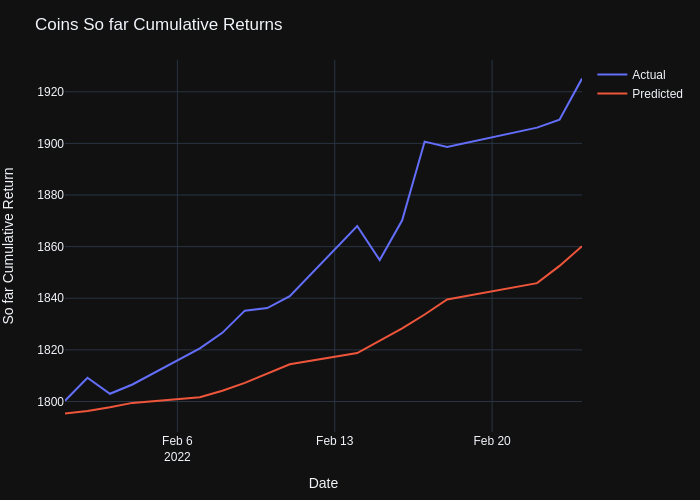

In [46]:
test_date = test.Date
test_gold_price = test.Gold
test_gold_return = pct_change(test_gold_price);
test_gold_return_lag = first_lag(test_gold_return)
df = DataFrame([test_gold_return_lag], ["gold_return_lag"]) 

test_gold_return_predicted = predict(gls, df)
test_gold_price_predicted = return_to_price(test_gold_return_predicted, train_gold_price[end]);

df = DataFrame([test_date[1:end-2], test_gold_price[1:end-2], test_gold_price_predicted], ["Date", "Actual", "Predicted"])

plot(
    [scatter(df, x=:Date, y=symbol, mode="lines", name=string(symbol)) for symbol in propertynames(df)[2:end]],
    PlotlyJS.Layout(
        title="Coins So far Cumulative Returns",
        width=900,
        height=600,
        xaxis_title="Date",
        yaxis_title="So far Cumulative Return",)
)

## RMSE (Root Mean Squered Error) 

In [47]:
(df[:, :Actual] .- df[:, :Predicted]) .^ 2 |> sum |> sqrt

165.69489926058063

## Gold return on gold return first lag, oil return and fed funds rate 

In [48]:
gold_price = train[!, "Gold"]
train_last_gold_price = gold_price[end]

oil_price = train[!, "Crude Oil"]

gold_return = pct_change(gold_price);
oil_return = pct_change(oil_price);

gold_return_lag = first_lag(gold_return)
oil_return_lag = first_lag(oil_return)

df = DataFrame([gold_return[2:end], gold_return_lag, oil_return_lag], ["gold_return", "gold_return_lag", "oil_return_lag"]) 

gls = glm(@formula(gold_return ~ gold_return_lag + oil_return_lag), df, Normal())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Normal{Float64}, IdentityLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

gold_return ~ 1 + gold_return_lag + oil_return_lag

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                        Coef.   Std. Error      z  Pr(>|z|)     Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)       0.000273775  0.000221005   1.24    0.2154  -0.000159387  0.000706937
gold_return_lag  -0.0111826    0.0237753    -0.47    0.6381  -0.0577814    0.0354161
oil_return_lag    0.00141709   0.00260629    0.54    0.5866  -0.00369115   0.00652533
──────────────────────────────────────────────────────────────────────────────────────

### Coefficients is not meaningful. (because p-values are larger than significance level of 0.05) so we can't interpret these coefficients.

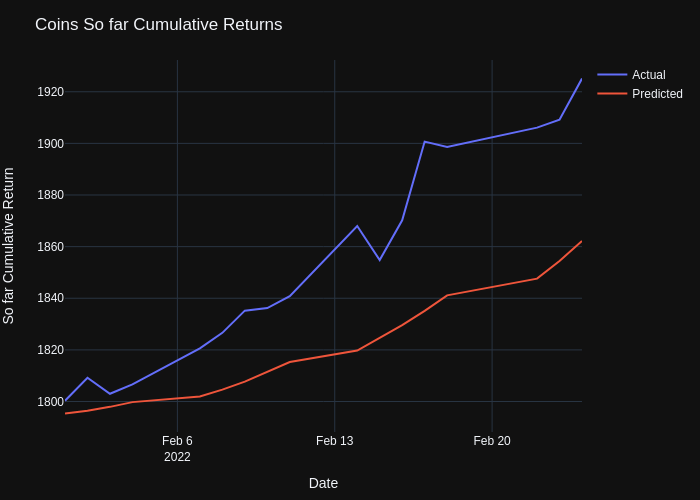

In [49]:
gold_price = test[!, "Gold"]
oil_price = test[!, "Crude Oil"]

gold_return = pct_change(gold_price);
oil_return = pct_change(oil_price);

gold_return_lag = first_lag(gold_return)
oil_return_lag = first_lag(oil_return)

df = DataFrame([gold_return[2:end], gold_return_lag, oil_return_lag], ["gold_return", "gold_return_lag", "oil_return_lag"]) 

test_gold_return_predicted = predict(gls, df)

test_gold_return_predicted

test_gold_price_predicted = return_to_price(test_gold_return_predicted, train_last_gold_price);

df = DataFrame([test_date[1:end-2], test_gold_price[1:end-2], test_gold_price_predicted], ["Date", "Actual", "Predicted"])

plot(
    [scatter(df, x=:Date, y=symbol, mode="lines", name=string(symbol)) for symbol in propertynames(df)[2:end]],
    PlotlyJS.Layout(
        title="Coins So far Cumulative Returns",
        width=900,
        height=600,
        xaxis_title="Date",
        yaxis_title="So far Cumulative Return",)
)


## RMSE (Root Mean Squered Error) 

In [50]:
(df[:, :Actual] .- df[:, :Predicted]) .^ 2 |> sum |> sqrt

161.17869989414973

## Gold return on gold return first lag, oil return

In [51]:
gold_price = train[!, "Gold"]
train_last_gold_price = gold_price[end]

oil_price = train[!, "Crude Oil"]
ffr_price = train[!, "Fed Funds Rate"] # Fed Funds Rate is the rate of interest paid by the Federal Reserve. like price

gold_return = pct_change(gold_price);
oil_return = pct_change(oil_price);
ffr_return = pct_change(ffr_price)

gold_return_lag = first_lag(gold_return)
oil_return_lag = first_lag(oil_return)
ffr_return_lag = first_lag(ffr_return)

df = DataFrame([gold_return[2:end], gold_return_lag, oil_return_lag, ffr_return_lag], ["gold_return", "gold_return_lag", "oil_return_lag", "ffr_return_lag"]) 

gls = glm(@formula(gold_return ~ gold_return_lag + oil_return_lag + ffr_return_lag), df, Normal())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Normal{Float64}, IdentityLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

gold_return ~ 1 + gold_return_lag + oil_return_lag + ffr_return_lag

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                        Coef.  Std. Error      z  Pr(>|z|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)       0.000287209  0.00022115   1.30    0.1940  -0.000146237  0.000720654
gold_return_lag  -0.0123288    0.0237827   -0.52    0.6042  -0.0589419    0.0342844
oil_return_lag    0.00139463   0.00260562   0.54    0.5925  -0.00371229   0.00650155
ffr_return_lag   -0.00308008   0.00218798  -1.41    0.1592  -0.00736843   0.00120828
─────────────────────────────────────────────────────────────────────────────────────

### Coefficients is not meaningful. (because p-values are larger than significance level of 0.05) so we can't interpret these coefficients.

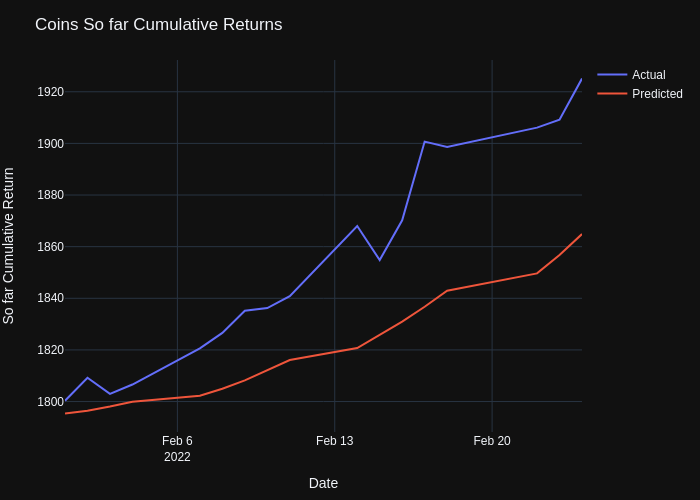

In [52]:

gold_price = test[!, "Gold"]
oil_price = test[!, "Crude Oil"]
ffr_price = test[!, "Fed Funds Rate"] # Fed Funds Rate is the rate of interest paid by the Federal Reserve. like price

gold_return = pct_change(gold_price);
oil_return = pct_change(oil_price);
ffr_return = pct_change(ffr_price);


gold_return_lag = first_lag(gold_return)
oil_return_lag = first_lag(oil_return)
ffr_return_lag = first_lag(ffr_return)

df = DataFrame([gold_return[2:end], gold_return_lag, oil_return_lag, ffr_return_lag], ["gold_return", "gold_return_lag", "oil_return_lag", "ffr_return_lag"]) 

test_gold_return_predicted = predict(gls, df)

test_gold_return_predicted

test_gold_price_predicted = return_to_price(test_gold_return_predicted, train_last_gold_price);

df = DataFrame([test_date[1:end-2], test_gold_price[1:end-2], test_gold_price_predicted], ["Date", "Actual", "Predicted"])

plot(
    [scatter(df, x=:Date, y=symbol, mode="lines", name=string(symbol)) for symbol in propertynames(df)[2:end]],
    PlotlyJS.Layout(
        title="Coins So far Cumulative Returns",
        width=900,
        height=600,
        xaxis_title="Date",
        yaxis_title="So far Cumulative Return",)
)

## RMSE (Root Mean Squered Error) 

In [53]:
(df[:, :Actual] .- df[:, :Predicted]) .^ 2 |> sum |> sqrt

156.06412046442986

# Conclusion

As expected, with the addition of oil price and US Federal Reserve interest rates, the forecast result will be better. (mse is smaller)